Escenario

Trabajas como analista de riesgos en un banco. Aparte de los otros servicios bancarios y de préstamos, el banco también proporciona servicios de tarjetas de crédito que son una fuente muy importante de ingresos para el banco. El banco quiere entender la demografía y otras características de sus clientes que aceptan una oferta de tarjeta de crédito y que no aceptan una tarjeta de crédito.

Por lo general, los datos de observación para este tipo de problemas es algo limitado en que a menudo la empresa ve solo aquellos que responden a una oferta. Para evitar esto, el banco diseña un estudio de marketing centrado, con 18.000 clientes bancarios actuales. Este enfoque enfocado permite al banco saber quién responde y quién no a la oferta, y utilizar los datos demográficos existentes que ya están disponibles en cada cliente.

Objetivo

Cree un modelo que le permita comprender por qué algunos clientes bancarios aceptan ofertas de tarjetas de crédito. También hay otras áreas potenciales de oportunidades que el banco quiere entender a partir de los datos.

Su alta dirección también ha publicado estas otras preguntas que les ayudarán a entender mejor a sus clientes.

Dataset

Customer Number: Un número secuencial asignado a los clientes (esta columna está oculta y excluida - este identificador único no se utilizará directamente).

Offer Accepted: El cliente aceptó (Sí) o rechazó (No) la oferta. 

Reward: El tipo de programa de recompensa ofrecido por la tarjeta.

Mailer Type: Carta o postal.

Income Level: bajo, medio o alto.

Bank Accounts Open: Cuántas cuentas sin tarjeta de crédito están en manos del cliente.

Overdraft Protection: ¿Tiene el cliente protección contra sobregiros en su cuenta corriente(s) (Sí o No).

Credit Rating: baja, media o alta.

Credit Cards Held: El número de tarjetas de crédito mantenidas en el banco.

Homes Owned: El número de casas propiedad del cliente.

Household Size: El número de individuos en la familia.

Own Your Home: ¿El cliente posee su hogar? (Sí o No).

Average Balance: Saldo promedio de la cuenta (en todas las cuentas a lo largo del tiempo). Q1, Q2, Q3 y Q4

Balance: El saldo medio de cada trimestre del último año

# Objetivo del Modelo

#### Determinar si la incorporación de la variable "es dueño de su propia casa" representa los requisitos para que el cliente se convierta en un prospecto para la Entidad.




# INPUTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
columnas = ['Customer Number', 'Offer Accepted', 'Reward', 'Mailer Type', 'Income Level', 'Bank Accounts Open', 'Overdraft Protection', 'Credit Rating', 'Credit Cards Held', 'Homes Owned', 'Household Size', 'Own Your Home', 'Average Balance', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance']
base = pd.read_csv('creditcardmarketing.csv', header=None, names=columnas)

In [3]:
df = pd.DataFrame(base)

# Revisión de la información

In [4]:
df.shape

(18000, 17)

In [5]:
df.head(10)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,Bank Accounts Open,Overdraft Protection,Credit Rating,Credit Cards Held,Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
5,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
6,7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0,132.0
7,8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50,132.0,391.0,285.0,306.0
8,9,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,1005.00,894.0,891.0,882.0,1353.0
9,10,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,974.25,1814.0,1454.0,514.0,115.0


In [6]:
new_cols=[]
for col in df.columns:
    new_col = col.lower().replace(' ', '_')
    new_cols.append(new_col)
new_cols

df.columns=new_cols

In [7]:
df.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'credit_cards_held', 'homes_owned', 'household_size',
       'own_your_home', 'average_balance', 'q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   bank_accounts_open    18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   credit_cards_held     18000 non-null  int64  
 9   homes_owned           18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  average_balance       17976 non-null  float64
 13  q1_balance            17976 non-null  float64
 14  q2_balance            17976 non-null  float64
 15  q3_balance         

In [9]:
df[df.average_balance.isnull()]

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
323,324,No,Points,Postcard,Medium,1,No,High,1,1,4,No,NaN,NaN,NaN,NaN,NaN
3070,3071,Yes,Air Miles,Postcard,Low,3,No,Medium,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3108,3109,No,Air Miles,Letter,Low,1,No,High,3,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3789,3790,No,Air Miles,Letter,Medium,2,No,High,3,1,3,No,NaN,NaN,NaN,NaN,NaN
5083,5084,No,Points,Letter,Medium,1,No,High,1,1,3,Yes,NaN,NaN,NaN,NaN,NaN
5677,5678,No,Air Miles,Postcard,Low,1,No,Low,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
5689,5690,No,Air Miles,Postcard,Medium,1,No,Medium,3,1,5,No,NaN,NaN,NaN,NaN,NaN
6932,6933,No,Air Miles,Postcard,Medium,1,No,Medium,2,2,4,Yes,NaN,NaN,NaN,NaN,NaN
7787,7788,No,Air Miles,Letter,Low,2,No,Low,1,1,4,Yes,NaN,NaN,NaN,NaN,NaN
7864,7865,No,Cash Back,Postcard,High,2,Yes,Low,2,1,3,No,NaN,NaN,NaN,NaN,NaN


In [10]:
df.average_balance = df.average_balance.fillna(df.average_balance.mean())
df.q1_balance = df.q1_balance.fillna(df.q1_balance.mean())
df.q2_balance = df.q2_balance.fillna(df.q2_balance.mean())
df.q3_balance = df.q3_balance.fillna(df.q3_balance.mean())
df.q4_balance = df.q4_balance.fillna(df.q4_balance.mean())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   bank_accounts_open    18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   credit_cards_held     18000 non-null  int64  
 9   homes_owned           18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  average_balance       18000 non-null  float64
 13  q1_balance            18000 non-null  float64
 14  q2_balance            18000 non-null  float64
 15  q3_balance         

In [12]:
df_cat = df.select_dtypes('object')

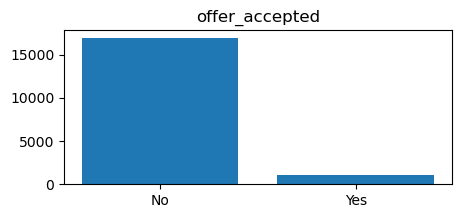

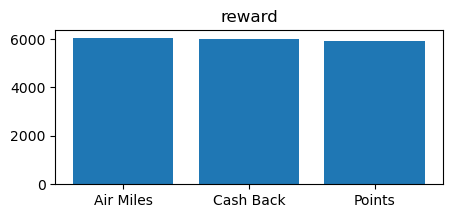

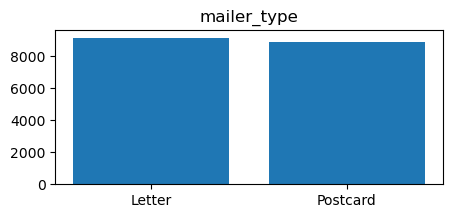

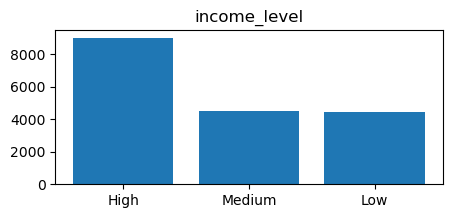

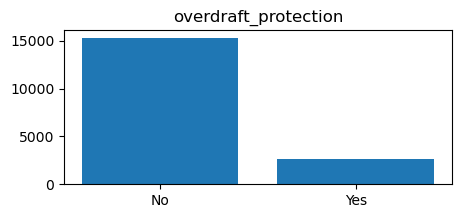

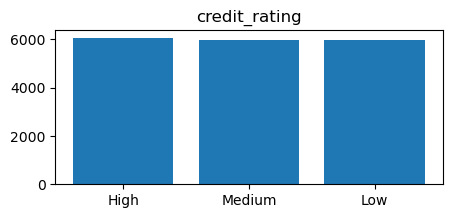

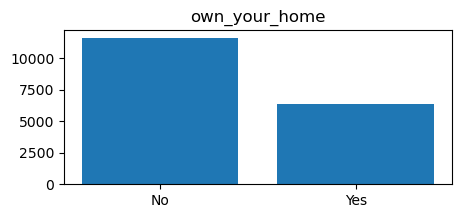

In [13]:
for c in df_cat.columns:
    plt.figure(figsize=(5,2))
    plt.bar(df[c].unique(),df[c].value_counts())
    plt.title(c)
    plt.show()

##### *De la revisión a las coolumnas categóricas se concluye que no utilizaremos las columnas: 'offer_accepted', 'reward' y 'mailer_type', ya que para el perfil que queremos determinar de los clientes estas columnas no nos proporcionan información adicional.
##### Asimismo, se deben transformar las columas 'income_level', 'overdraft_protection', 'credit_rating', 'own_your_home'.

In [14]:
df_num = df.select_dtypes(exclude='object')

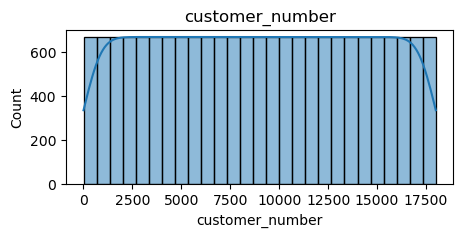

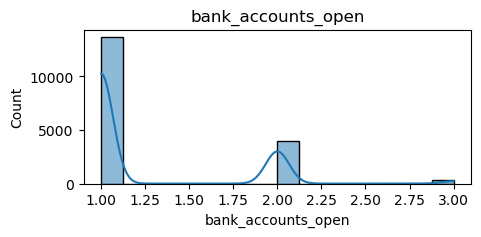

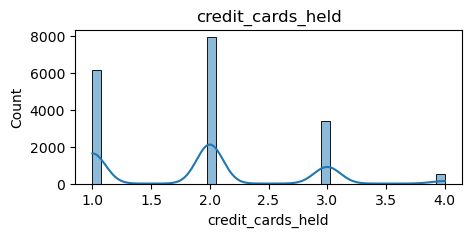

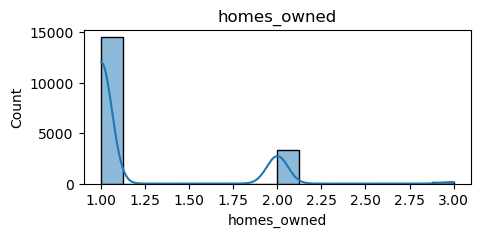

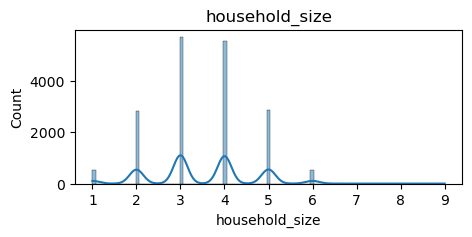

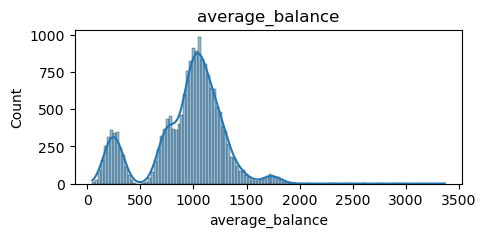

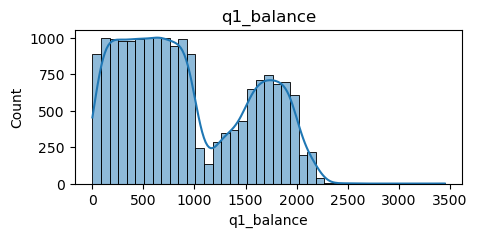

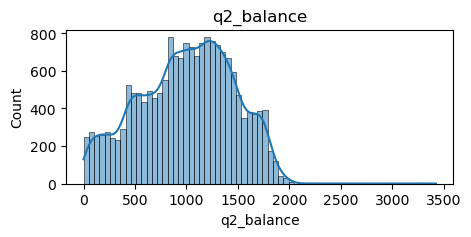

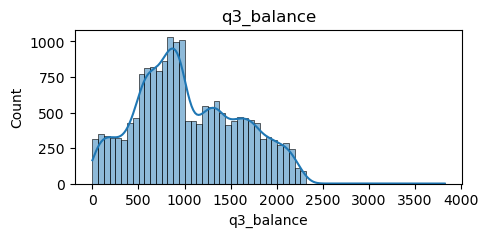

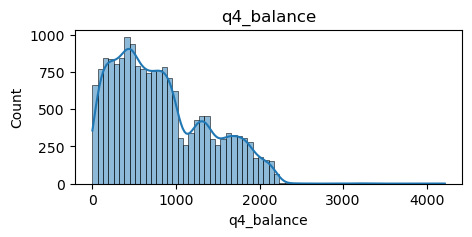

In [15]:
for c in df_num.columns:
    plt.figure(figsize=(5,2))
    sns.histplot(df[c], kde=True)
    plt.title(c)
    plt.show()

In [16]:
df_f = df[['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size', 'average_balance','q1_balance', 'q2_balance', 'q3_balance','q4_balance']]

In [17]:
correl = df_f.corr()
correl

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
bank_accounts_open,1.000000,-0.001728,0.004772,0.008479,-0.003906,-0.002812,-0.007949,0.000190,-0.000355
credit_cards_held,-0.001728,1.000000,-0.002547,-0.003074,-0.003467,-0.009440,-0.007369,-0.007619,0.015354
homes_owned,0.004772,-0.002547,1.000000,0.005304,0.017959,0.013138,0.009754,0.007771,0.014769
household_size,0.008479,-0.003074,0.005304,1.000000,-0.003581,-0.005078,-0.008762,0.003631,0.000232
average_balance,-0.003906,-0.003467,0.017959,-0.003581,1.000000,0.481507,0.800285,0.752741,0.572380
q1_balance,-0.002812,-0.009440,0.013138,-0.005078,0.481507,1.000000,0.483134,-0.060961,-0.237283
q2_balance,-0.007949,-0.007369,0.009754,-0.008762,0.800285,0.483134,1.000000,0.487710,0.168955
q3_balance,0.000190,-0.007619,0.007771,0.003631,0.752741,-0.060961,0.487710,1.000000,0.565298
q4_balance,-0.000355,0.015354,0.014769,0.000232,0.572380,-0.237283,0.168955,0.565298,1.000000


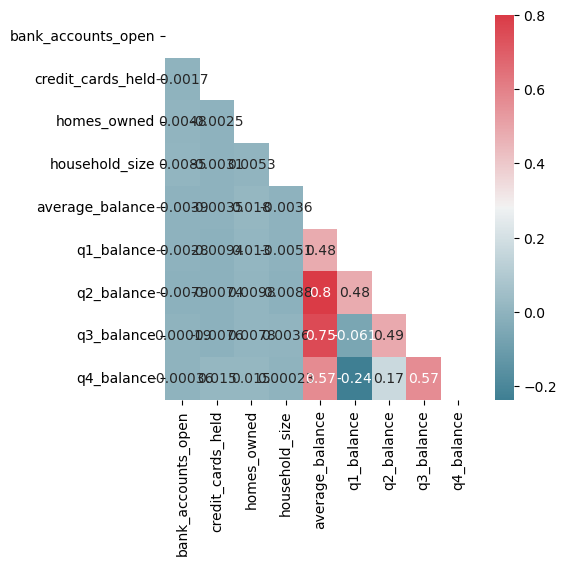

In [18]:
mask=np.triu(np.ones_like(correl, dtype=bool))

f, ax=plt.subplots(figsize=(5, 5))                 

cmap=sns.diverging_palette(220, 10, as_cmap=True)   

sns.heatmap(correl, mask=mask, cmap=cmap, annot=True)
plt.show()

##### *De la revisión a las coolumnas numéricas se concluye que no utilizaremos las columnas: 'customer_number' (ya que no proporciona información adicional alguna) 'q1_balance', 'q2_balance', 'q3_balance' y 'q4_balance' ya que mustran una gran correlación con el campo objeto de análisis

# Modelo

In [19]:
clean_df = df.drop(['customer_number','offer_accepted','reward','mailer_type','q1_balance', 'q2_balance', 'q3_balance','q4_balance'], axis=1)
#Eliminando las columnas innecesarias

In [20]:
clean_df

,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance
0,High,1,No,High,2,1,4,No,1160.75
1,Medium,1,No,Medium,2,2,5,Yes,147.25
2,High,2,No,Medium,2,1,2,Yes,276.50
3,Medium,2,No,High,1,1,4,No,1219.00
4,Medium,1,No,Medium,2,1,6,Yes,1211.00
...,...,...,...,...,...,...,...,...,...
17995,High,1,No,Low,1,1,5,Yes,167.50
17996,High,1,No,Low,3,1,3,Yes,850.50
17997,High,1,No,Low,2,1,4,No,1087.25
17998,Medium,1,No,Medium,4,2,2,Yes,1022.25


In [21]:
#CAMBIAR CATEGÓRICAS A NUMÉRICAS 'income_level', 'overdraft_protection', 'credit_rating', 'own_your_home'
clean_df['income_level'].value_counts().keys()

Index(['Medium', 'High', 'Low'], dtype='object', name='income_level')

In [22]:
le = LabelEncoder()
le.fit(['Medium', 'High', 'Low'])
clean_df['income_level']= le.transform(clean_df['income_level'])
clean_df

,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance
0,0,1,No,High,2,1,4,No,1160.75
1,2,1,No,Medium,2,2,5,Yes,147.25
2,0,2,No,Medium,2,1,2,Yes,276.50
3,2,2,No,High,1,1,4,No,1219.00
4,2,1,No,Medium,2,1,6,Yes,1211.00
...,...,...,...,...,...,...,...,...,...
17995,0,1,No,Low,1,1,5,Yes,167.50
17996,0,1,No,Low,3,1,3,Yes,850.50
17997,0,1,No,Low,2,1,4,No,1087.25
17998,2,1,No,Medium,4,2,2,Yes,1022.25


In [23]:
clean_df['overdraft_protection'].value_counts().keys()

Index(['No', 'Yes'], dtype='object', name='overdraft_protection')

In [24]:
le = LabelEncoder()
le.fit(['No', 'Yes'])
clean_df['overdraft_protection']= le.transform(clean_df['overdraft_protection'])
clean_df

,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance
0,0,1,0,High,2,1,4,No,1160.75
1,2,1,0,Medium,2,2,5,Yes,147.25
2,0,2,0,Medium,2,1,2,Yes,276.50
3,2,2,0,High,1,1,4,No,1219.00
4,2,1,0,Medium,2,1,6,Yes,1211.00
...,...,...,...,...,...,...,...,...,...
17995,0,1,0,Low,1,1,5,Yes,167.50
17996,0,1,0,Low,3,1,3,Yes,850.50
17997,0,1,0,Low,2,1,4,No,1087.25
17998,2,1,0,Medium,4,2,2,Yes,1022.25


In [25]:
clean_df['credit_rating'].value_counts().keys()

Index(['High', 'Medium', 'Low'], dtype='object', name='credit_rating')

In [26]:
le = LabelEncoder()
le.fit(['Medium', 'High', 'Low'])
clean_df['credit_rating']= le.transform(clean_df['credit_rating'])
clean_df

,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance
0,0,1,0,0,2,1,4,No,1160.75
1,2,1,0,2,2,2,5,Yes,147.25
2,0,2,0,2,2,1,2,Yes,276.50
3,2,2,0,0,1,1,4,No,1219.00
4,2,1,0,2,2,1,6,Yes,1211.00
...,...,...,...,...,...,...,...,...,...
17995,0,1,0,1,1,1,5,Yes,167.50
17996,0,1,0,1,3,1,3,Yes,850.50
17997,0,1,0,1,2,1,4,No,1087.25
17998,2,1,0,2,4,2,2,Yes,1022.25


In [27]:
clean_df['own_your_home'].value_counts().keys()

Index(['Yes', 'No'], dtype='object', name='own_your_home')

In [28]:
le = LabelEncoder()
le.fit(['No', 'Yes'])
clean_df['own_your_home']= le.transform(clean_df['own_your_home'])
clean_df

,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance
0,0,1,0,0,2,1,4,0,1160.75
1,2,1,0,2,2,2,5,1,147.25
2,0,2,0,2,2,1,2,1,276.50
3,2,2,0,0,1,1,4,0,1219.00
4,2,1,0,2,2,1,6,1,1211.00
...,...,...,...,...,...,...,...,...,...
17995,0,1,0,1,1,1,5,1,167.50
17996,0,1,0,1,3,1,3,1,850.50
17997,0,1,0,1,2,1,4,0,1087.25
17998,2,1,0,2,4,2,2,1,1022.25


#### De lo anterior, la variable target será 'own_your_home'

In [29]:
x = clean_df.drop(['own_your_home'], axis = 1)
y = clean_df['own_your_home']

In [30]:
x.shape, y.shape

((18000, 8), (18000,))

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
classification = LogisticRegression(random_state=42, solver='lbfgs',
                        class_weight='balanced').fit(X_train, y_train)

In [33]:
classification.coef_, classification.intercept_, classification.n_iter_

(array([[ 3.26239252e-02,  3.06608837e-02,  6.24952543e-02,
          1.34630661e-02,  1.18137139e-02,  1.78771504e-02,
         -2.97867807e-02,  1.20689903e-05]]),
 array([-0.05271184]),
 array([60], dtype=int32))

#### Evaluación de resultados

In [34]:
from sklearn.metrics import confusion_matrix

y_pred_train = classification.predict(X_train)
cm=confusion_matrix(y_pred_train, y_train)
cm

array([[2631, 4668],
       [2415, 4686]])

In [35]:
clean_df.own_your_home.value_counts()

own_your_home
1    11655
0     6345
Name: count, dtype: int64

In [36]:
y_train.value_counts()

own_your_home
1    9354
0    5046
Name: count, dtype: int64

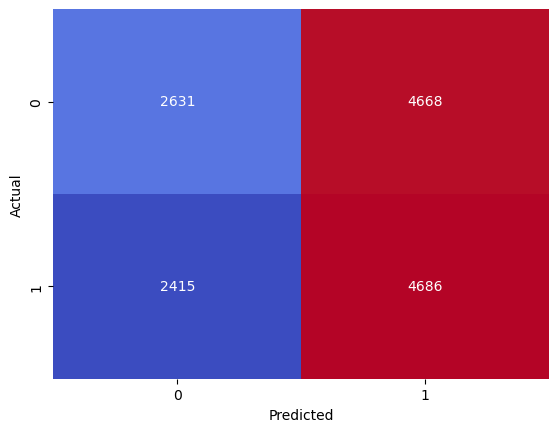

In [37]:
sns.heatmap(cm, fmt='', cmap='coolwarm', cbar=False, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

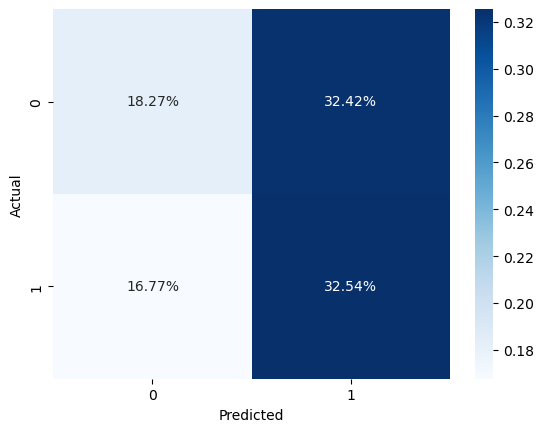

In [38]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [39]:
y_pred_test = classification.predict(X_test)
cm_test = confusion_matrix(y_pred_test, y_test)
cm_test

array([[ 652, 1158],
       [ 647, 1143]])

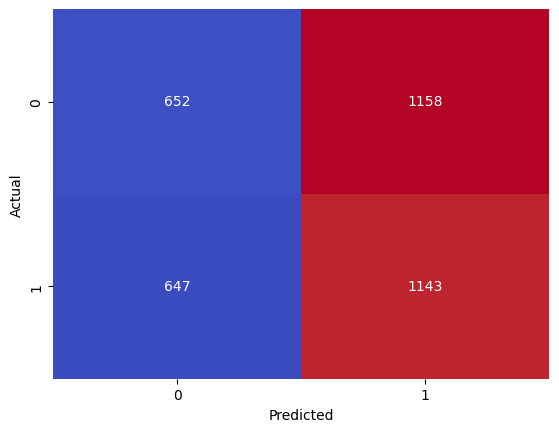

In [40]:
sns.heatmap(cm_test, fmt='', cmap='coolwarm', cbar=False, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

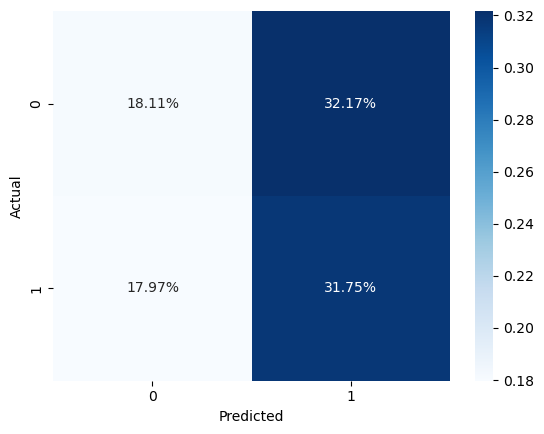

In [41]:
sns.heatmap(cm_test/np.sum(cm_test), annot=True, 
            fmt='.2%', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
y_train

1921     1
5732     1
2455     0
12131    1
16612    0
        ..
11284    1
11964    0
5390     1
860      1
15795    1
Name: own_your_home, Length: 14400, dtype: int64

In [44]:
X_test

,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,average_balance
2574,2,1,0,0,2,1,5,207.50
7496,0,1,0,1,2,2,2,912.00
9210,2,1,0,0,3,1,4,1316.25
5456,2,1,1,2,1,1,5,732.25
736,1,1,0,2,1,1,3,1087.00
...,...,...,...,...,...,...,...,...
9945,0,1,0,2,2,1,3,1708.75
9236,2,2,0,0,1,2,4,824.50
14176,0,2,0,2,2,1,4,871.50
13889,0,1,0,0,1,1,4,1139.75


In [46]:
yunir = pd.DataFrame(y_test)

In [49]:
yunir

,own_your_home
2574,0
7496,1
9210,1
5456,0
736,1
...,...
9945,1
9236,0
14176,1
13889,0


In [66]:
finalTest = X_test.merge(yunir, how='inner', left_index=True,right_index=True)

In [68]:
finalTest.to_csv('datos_test.csv')